In [6]:

#from run_metroman import retrieve_obs
from metroman.MetroManVariables import Domain,Observations,Chain,RandomSeeds,Experiment,Prior,Estimates


"""
Variables to be read from the shapfile: wse, width, slope2
put into AllObs.h,w, and S
     # 1.3.3 read height, width and slope
        h=swot_dataset["reach/wse"][0:nt_reach].filled(np.nan)
        AllObs.h[i,:]=h[overlap_fs[reach['reach_id']]]
        w=swot_dataset["reach/width"][0:nt_reach].filled(np.nan)
        AllObs.w[i,:]=w[overlap_fs[reach['reach_id']]]
        S=swot_dataset["reach/slope2"][0:nt_reach].filled(np.nan)
        AllObs.S[i,:]=S[overlap_fs[reach['reach_id']]]
"""
shapefile = r'D:\tmp\unzipped\m1_m3_m7.shp'
import geopandas as gpd
gdf = gpd.read_file(shapefile)



# read reach prior data

# read the Sos prior file v16 for priors



## Read SWOT observation

- According to the code, at least four times of SWOT observation should be retrieved

In [69]:
tall

[datetime.datetime(2024, 4, 13, 19, 0),
 datetime.datetime(2024, 4, 14, 6, 0),
 datetime.datetime(2024, 5, 5, 2, 0),
 datetime.datetime(2024, 5, 25, 12, 0),
 datetime.datetime(2024, 5, 25, 23, 0),
 datetime.datetime(2024, 6, 15, 9, 0),
 datetime.datetime(2024, 6, 15, 20, 0),
 datetime.datetime(2024, 7, 6, 6, 0),
 datetime.datetime(2024, 7, 6, 17, 0),
 datetime.datetime(2024, 7, 27, 3, 0)]

In [165]:
import datetime
from numpy import empty,reshape
from datetime import timedelta
#reach_ids = [73282400081, 73282400061, 73282400051, 73282400041, 73282400031]
reach_ids = [73282400031,73282400041,73282400051,73282400061,73282400081]

#reach_ids = [74210000201,]
DAll = Domain()
DAll.nR = len(reach_ids)

selected = gdf[['reach_id','slope2','wse','width','time_tai','time_str']]

#get the times first

obs_dict = {}
unique_times = set()
epoch = datetime.datetime(2000,1,1,0,0,0)
# round the time to the precision of hours
for reach_id in reach_ids:
    reach_data = selected.loc[selected['reach_id'] == str(reach_id)]
    
    for _,row in reach_data.iterrows():
        t = epoch + timedelta(seconds=row['time_tai'])
        t_hour = (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)+timedelta(hours=t.minute//30) - epoch).total_seconds()

        unique_times.add(t_hour)
overlap_ts = sorted(unique_times)


nt = len(overlap_ts)
print(nt)
DAll.nt = nt
tall = [ epoch + datetime.timedelta(seconds=t) for t in overlap_ts ]


talli=empty(DAll.nt)
for i in range(DAll.nt):
    dt=(tall[i]-tall[0])
    talli[i]=dt.days + dt.seconds/86400.
    
DAll.t=reshape(talli,[1,DAll.nt])

#get all observations
AllObs = Observations(DAll)
for index, reach_id in enumerate(reach_ids):
    reach_data = selected.loc[selected['reach_id'] == str(reach_id)]
    obs_dict = {}
    # initialize the dictionary with missing data values
    for t in overlap_ts:
        obs_dict[t] = {'slope':None,'wse': None,'width':None,'time_str': None}
    
    # fill the dictionary with data read from the shapfile
    for _,row in reach_data.iterrows():
        t = epoch + timedelta(seconds=row['time_tai'])
        t_hour = (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)+timedelta(hours=t.minute//30) - epoch).total_seconds()
        obs_dict[t_hour] = {'slope':row['slope2'],'wse': row['wse'],'width':row['width'],'time_str': row['time_str']}
    # reach swot observation data
    sorted_dict = dict(sorted(obs_dict.items()))
    # use a shapefile instead of the netcdf data
    # get times 
    for i,key in enumerate(sorted_dict.keys()):
        AllObs.S[index,i] = sorted_dict[key]['slope']
        AllObs.h[index,i] = sorted_dict[key]['wse']
        AllObs.w[index,i] = sorted_dict[key]['width']



if True:   
    AllObs.sigS=1.7e-5
    AllObs.sigh=0.1
    AllObs.sigw=10
else:
    AllObs=0.


16


In [146]:
P.meanA0

array([754.45359946, 760.5075816 , 630.36847788, 662.43216736,
       681.79867304])

In [ ]:
import numpy as np
data = AllObs.w
mean = np.mean(data, axis=1, keepdims=True)
std = np.std(data, axis=1, keepdims=True)

# Define allowable bounds
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

# Clip values to bounds
adjusted_data = np.clip(AllObs.w, lower_bound, upper_bound)

# Print adjusted data
print(adjusted_data)
print(AllObs.w)


[[294.225675   338.1122809  269.282768   264.033816   268.942892
  261.345392   256.002394   268.583579   338.1122809  242.68973235
  294.000227   336.734637   325.646238   279.201218   338.1122809
  247.322612  ]
 [ 96.881385   100.82426    115.411919    80.70183936  90.70848
   80.70183936 134.635167    90.164358   142.60552214  80.70183936
  117.230197   127.899131   142.60552214 118.908229   142.60552214
   89.907964  ]
 [118.227677   141.175529   115.896289   116.751712   109.093763
  111.604049   180.18987024 119.323696   153.134196    99.06646201
  135.82552    115.774783   180.18987024 130.990333   138.663976
  169.014371  ]
 [114.366154   201.18176104 113.635288   105.790845   116.195832
  105.12004209 201.18176104 136.23329    155.78613    190.707342
  141.131492   123.673414   159.25407    125.327082   156.78879
  186.578877  ]
 [109.458656   169.135682   108.775224   101.23188    106.084792
  102.213147   182.92715206 122.907124   145.827484   182.92715206
  141.179718   11

In [166]:
# Filter the width data using mean + 1 std
data = AllObs.w
mean = np.mean(data, axis=1, keepdims=True)
std = np.std(data, axis=1, keepdims=True)

# Define allowable bounds
lower_bound = mean - 1 * std
upper_bound = mean + 1 * std

# Clip values to bounds
adjusted_data = np.clip(data, lower_bound, upper_bound)
AllObs.w = adjusted_data

# Filter the height data using mean + 1 std
data = AllObs.h
mean = np.mean(data, axis=1, keepdims=True)
std = np.std(data, axis=1, keepdims=True)

# Define allowable bounds
lower_bound = mean - 0.2 * std
upper_bound = mean + 0.2 * std

# Clip values to bounds
adjusted_data = np.clip(AllObs.h, lower_bound, upper_bound)
AllObs.h = adjusted_data            


            
                        

In [158]:
AllObs.w

array([[109.458656  , 169.135682  , 108.775224  , 101.23188   ,
        106.084792  , 102.213147  , 182.92715206, 122.907124  ,
        145.827484  , 182.92715206, 141.179718  , 112.507064  ,
        158.611488  , 109.96839   , 135.534016  , 175.420241  ],
       [114.366154  , 201.18176104, 113.635288  , 105.790845  ,
        116.195832  , 105.12004209, 201.18176104, 136.23329   ,
        155.78613   , 190.707342  , 141.131492  , 123.673414  ,
        159.25407   , 125.327082  , 156.78879   , 186.578877  ],
       [118.227677  , 141.175529  , 115.896289  , 116.751712  ,
        109.093763  , 111.604049  , 180.18987024, 119.323696  ,
        153.134196  ,  99.06646201, 135.82552   , 115.774783  ,
        180.18987024, 130.990333  , 138.663976  , 169.014371  ],
       [ 96.881385  , 100.82426   , 115.411919  ,  80.70183936,
         90.70848   ,  80.70183936, 134.635167  ,  90.164358  ,
        142.60552214,  80.70183936, 117.230197  , 127.899131  ,
        142.60552214, 118.908229  , 1

In [130]:
tall

[datetime.datetime(2024, 4, 13, 19, 0),
 datetime.datetime(2024, 4, 14, 6, 0),
 datetime.datetime(2024, 5, 5, 2, 0),
 datetime.datetime(2024, 5, 25, 12, 0),
 datetime.datetime(2024, 5, 25, 23, 0),
 datetime.datetime(2024, 6, 15, 9, 0),
 datetime.datetime(2024, 6, 15, 20, 0),
 datetime.datetime(2024, 7, 6, 6, 0),
 datetime.datetime(2024, 7, 6, 17, 0),
 datetime.datetime(2024, 7, 27, 3, 0)]

In [3]:
selected = gdf[['reach_id','slope2','wse','width','time_tai','time_str']]
selected = selected.loc[selected['reach_id'] == str(reach_id)]

In [218]:
obs_dict = {}
for index,row in selected.iterrows():
    print(row)
    obs_dict[row['time_tai']] = {'slope':row['slope2'],'wse': row['wse'],'width':row['width'],'time_str': row['time_str']}

reach_id             73282500151
slope2                  0.000006
wse                      30.8737
width                 332.802129
time_tai           766349113.992
time_str    2024-04-13T18:44:36Z
Name: 4, dtype: object
reach_id             73282500151
slope2                 -0.000019
wse                      29.8893
width                  72.484887
time_tai           766388070.228
time_str    2024-04-14T05:33:53Z
Name: 12, dtype: object
reach_id             73282500151
slope2                  0.000001
wse                      29.2006
width                 135.070848
time_tai           768190773.287
time_str    2024-05-05T02:18:56Z
Name: 20, dtype: object
reach_id             73282500151
slope2                  0.000016
wse                      28.9434
width                 325.875884
time_tai           769954521.887
time_str    2024-05-25T12:14:44Z
Name: 28, dtype: object
reach_id             73282500151
slope2                  0.000009
wse                      28.9416
width         

## Read priors

## Read Qbar

        # 1.3.4 read Qbar from SOS
        sosfile=sosdir.joinpath(reach["sos"])
        sos_dataset=Dataset(sosfile)
        
        sosreachids=sos_dataset["reaches/reach_id"][:]
        sosQbars=sos_dataset["model/mean_q"][:]
        k=np.argwhere(sosreachids == float(reach["reach_id"]))

In [20]:
# open a SoS file to read
import netCDF4 as nc
sosfile = r'D:\git\podaac_tutorials\notebooks\datasets\data_downloads\na_sword_v16_SOS_unconstrained_0001_20240726T123358_priors.nc'
priors = nc.Dataset(sosfile, format="NETCDF4") 
reaches  = priors['reaches']['reach_id'][:]
q_bars = priors['model/mean_q'][:]
swordfile = r"D:\workspace\SWOT-Confluence\offline-discharge-data-product-creation\data\input\sword\SWORD_v16_netcdf\netcdf\na_sword_v16.nc"
sword_dataset=nc.Dataset(swordfile)
swordreachids=sword_dataset["reaches/reach_id"][:]


In [21]:
sword_dataset.groups['reaches']['max_width'][:]

masked_array(data=[ 173.42123413, 2997.        ,  692.        , ...,
                    210.        ,  362.        ,  127.        ],
             mask=False,
       fill_value=1e+20)

In [167]:
from numpy import empty
import numpy as np
QBar=empty(DAll.nR)
reach_length=empty(DAll.nR)
dist_out=empty(DAll.nR)
for index, reach_id in enumerate(reach_ids):
    reach_index = np.where(reaches == reach_id)
    print(reach_index)
    QBar[index] = q_bars[reach_index]
    k=np.argwhere(swordreachids == reach_id)


    reach_lengths=sword_dataset["reaches/reach_length"][:]
    reach_length[index]=reach_lengths[k]

    dist_outs=sword_dataset["reaches/dist_out"][:]
    dist_out[index]=dist_outs[k]
DAll.L=reach_length
DAll.xkm=np.max(dist_out)-dist_out + DAll.L[0]/2 #reach midpoint distance downstream [m]
from numpy import reshape
DAll.t=reshape(talli,[1,DAll.nt])

# Reshape observations
AllObs.hv=reshape(AllObs.h, (DAll.nR*DAll.nt,1))
AllObs.Sv=reshape(AllObs.S, (DAll.nR*DAll.nt,1))
AllObs.wv=reshape(AllObs.w, (DAll.nR*DAll.nt,1))

(array([12671]),)
(array([12672]),)
(array([12673]),)
(array([12674]),)
(array([12676]),)


In [150]:
AllObs.w

array([[109.458656  , 169.135682  , 108.775224  , 101.23188   ,
        106.084792  , 102.213147  , 182.92715206, 122.907124  ,
        145.827484  , 182.92715206, 141.179718  , 112.507064  ,
        158.611488  , 109.96839   , 135.534016  , 175.420241  ],
       [114.366154  , 201.18176104, 113.635288  , 105.790845  ,
        116.195832  , 105.12004209, 201.18176104, 136.23329   ,
        155.78613   , 190.707342  , 141.131492  , 123.673414  ,
        159.25407   , 125.327082  , 156.78879   , 186.578877  ],
       [118.227677  , 141.175529  , 115.896289  , 116.751712  ,
        109.093763  , 111.604049  , 180.18987024, 119.323696  ,
        153.134196  ,  99.06646201, 135.82552   , 115.774783  ,
        180.18987024, 130.990333  , 138.663976  , 169.014371  ],
       [ 96.881385  , 100.82426   , 115.411919  ,  80.70183936,
         90.70848   ,  80.70183936, 134.635167  ,  90.164358  ,
        142.60552214,  80.70183936, 117.230197  , 127.899131  ,
        142.60552214, 118.908229  , 1

        #1.3.5 read reach length and flow distance
        swordfile=inputdir.joinpath('sword',reach["sword"])
        sword_dataset=Dataset(swordfile)
        swordreachids=sword_dataset["reaches/reach_id"][:]
        k=np.argwhere(swordreachids == reach["reach_id"])

        reach_lengths=sword_dataset["reaches/reach_length"][:]
        reach_length[i]=reach_lengths[k]

        dist_outs=sword_dataset["reaches/dist_out"][:]
        dist_out[i]=dist_outs[k]
        sword_dataset.close()

In [152]:
QBar

array([235.62818909, 235.62818909, 233.64848328, 233.64848328,
       202.98460388])

In [144]:
QBar = np.array([90,90,90,90,90])

# setup experiments


In [168]:
from run_metroman import set_up_experiment, process
C, R, Exp, P = set_up_experiment(DAll, Qbar=QBar)


# Process the data with observations

In [169]:
import importlib
from run_metroman import process
Estimate = process(DAll, AllObs=AllObs, Exp=Exp, P=P, R=R, C=C, Verbose=True)

Processing prior for reach 1 / 5 .
Processing prior for reach 2 / 5 .
Processing prior for reach 3 / 5 .
Processing prior for reach 4 / 5 .
Processing prior for reach 5 / 5 .
Prior MCMC Time: 4.02s
Iteration # 1 / 10000 .
Iteration # 1001 / 10000 .
Iteration # 2001 / 10000 .
Iteration # 3001 / 10000 .
Iteration # 4001 / 10000 .
Iteration # 5001 / 10000 .
Iteration # 6001 / 10000 .
Iteration # 7001 / 10000 .
Iteration # 8001 / 10000 .
Iteration # 9001 / 10000 .
McFLI MCMC Time: 12.58s
A0: Acceptance rate = 24.41  pct.
na: Acceptance rate = 23.369999999999997  pct.
x1 Acceptance rate = 26.13  pct.


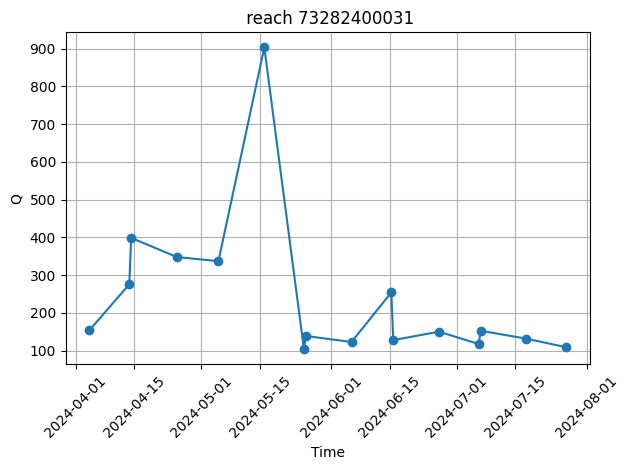

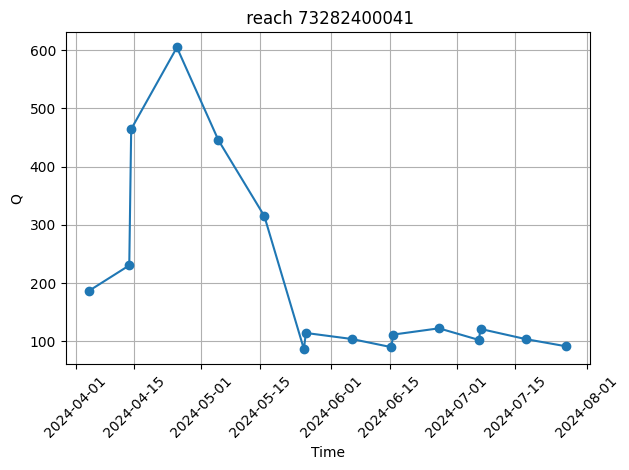

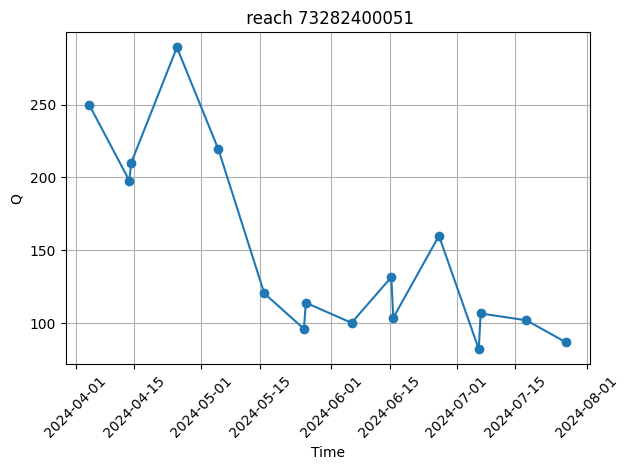

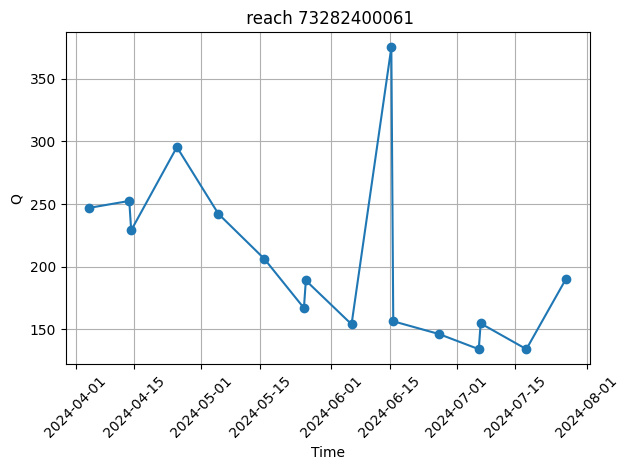

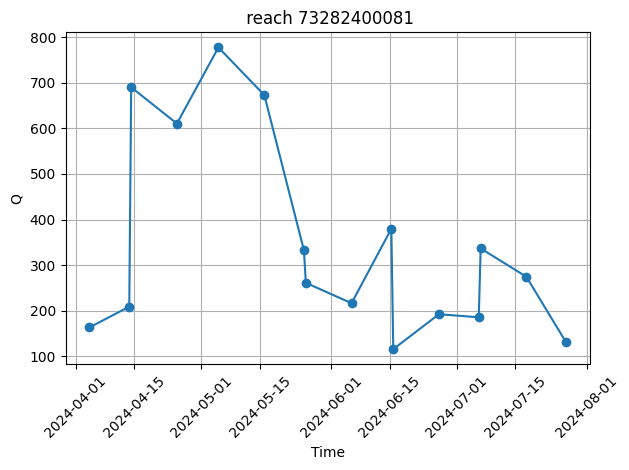

In [170]:
Estimate.AllQ
import matplotlib.pyplot as plt
for idx, row in enumerate(Estimate.AllQ):
    fig = plt.figure()
    plt.plot(tall, row, marker='o')
    plt.title(f' reach {reach_ids[idx]}')
    plt.xlabel('Time')
    plt.ylabel('Q')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()


In [149]:
AllQ = Estimate.AllQ
import pandas as pd
df = pd.DataFrame(AllQ.T,columns=reach_ids)
if len(tall) == df.shape[0]:
    df.insert(0,'date',tall)
df.to_csv('discharge1.csv')


In [80]:
from netCDF4 import Dataset
def write_output(outputdir, reachids, Estimate,overlap_ts):
    """Write data from MetroMan run to NetCDF file in output directory."""
    dataset = None
    try: 
        fillvalue = -999999999999



        setid = '-'.join(reachids) + "_metroman.nc"
        outfile = outputdir.joinpath(setid)

        dataset = Dataset(outfile, 'w', format="NETCDF4")
        dataset.set_id = setid    
        dataset.valid =  1 
        dataset.createDimension("nr", len(reachids))
        dataset.createDimension("nt", len(Estimate.AllQ[0]))

        nr = dataset.createVariable("nr", "i4", ("nr",))
        nr.units = "reach"
        nr[:] = range(1, len(Estimate.A0hat) + 1)

        nt = dataset.createVariable("nt", "i4", ("nt",))
        nt.units = "time steps"
        nt[:] = range(len(Estimate.AllQ[0]))

        
        reach_id = dataset.createVariable("reach_id", "i8", ("nr",))
        reach_id[:] = np.array(reachids, dtype=int)

        A0 = dataset.createVariable("A0hat", "f8", ("nr",), fill_value=fillvalue)
        A0[:] = Estimate.A0hat

        na = dataset.createVariable("nahat", "f8", ("nr",), fill_value=fillvalue)
        na[:] = Estimate.nahat
        
        x1 = dataset.createVariable("x1hat", "f8", ("nr",), fill_value=fillvalue)
        x1[:] = Estimate.x1hat

        allq = dataset.createVariable("allq", "f8", ("nr", "nt"), fill_value=fillvalue)
        allq[:] = Estimate.AllQ

        qu = dataset.createVariable("q_u", "f8", ("nr", "nt"), fill_value=fillvalue)
        qu[:] = Estimate.QhatUnc_HatAllAll

        t = dataset.createVariable("t","f8",("nt"),fill_value=fillvalue)
        t.long_name= 'swot timeseries "time" variable converted to hours and rounded to integer'
        t[:] = overlap_ts

    finally:
        if dataset:
            dataset.close()

In [83]:
list(overlap_ts)

[766349113.992,
 766388070.228,
 768190773.287,
 769954521.887,
 769993478.325,
 771757228.242,
 771796184.597,
 773559930.281,
 773598886.769,
 775362636.351]

In [84]:
from pathlib import Path

reachids_str = [str(reach_id) for reach_id in reach_ids]
write_output(Path(r'D:\workspace\SWOT-Confluence\data\output\alabama_rivers'),reachids=reachids_str,Estimate=Estimate,overlap_ts = list(overlap_ts))

In [ ]:
import numpy as np
import pandas as pd

# Create a 2D NumPy array
array_2d = np.random.rand(5, 10)  # 5 rows, 10 columns

# Convert the 2D NumPy array to a pandas DataFrame
df = pd.DataFrame(array_2d.T, columns=[f'Column{i+1}' for i in range(array_2d.shape[1])])

# Display the DataFrame
array_2d

array([[0.1848588 , 0.87550704, 0.67414558, 0.09892639, 0.56760582,
        0.87562713, 0.68296082, 0.72404635, 0.09396714, 0.27831302],
       [0.00686535, 0.09272362, 0.93216964, 0.65982747, 0.66163063,
        0.7453331 , 0.56916928, 0.29564067, 0.42976906, 0.83081315],
       [0.47357322, 0.78983882, 0.9493061 , 0.36803072, 0.16630736,
        0.85736156, 0.57033608, 0.08723875, 0.21886888, 0.61485257],
       [0.80774657, 0.92586448, 0.9772296 , 0.81376622, 0.17127379,
        0.43384949, 0.45552326, 0.06754823, 0.87836132, 0.95080098],
       [0.96663347, 0.27431616, 0.87688638, 0.81550812, 0.40728088,
        0.14298301, 0.76152064, 0.09425129, 0.13315378, 0.583351  ]])

2024-12-08T00:35:23 - category - : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-08T00:35:23 - category - : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


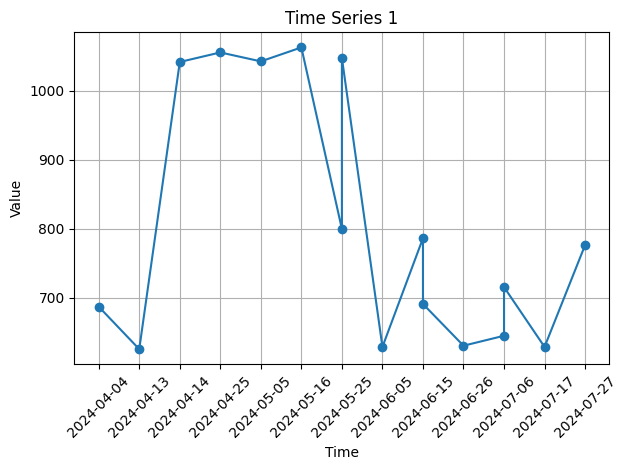

2024-12-08T00:35:23 - category - : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-08T00:35:23 - category - : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


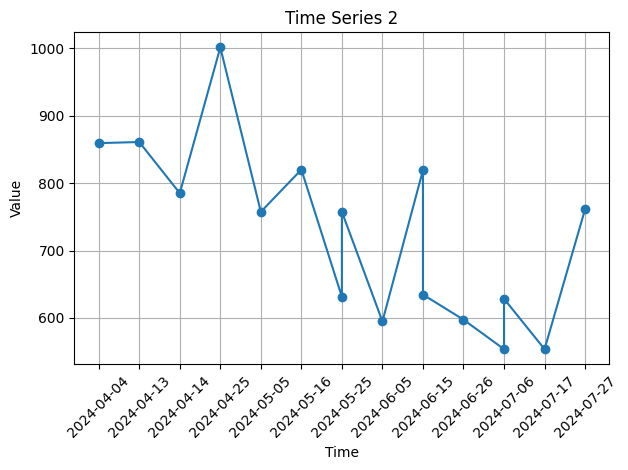

2024-12-08T00:35:23 - category - : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-08T00:35:23 - category - : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


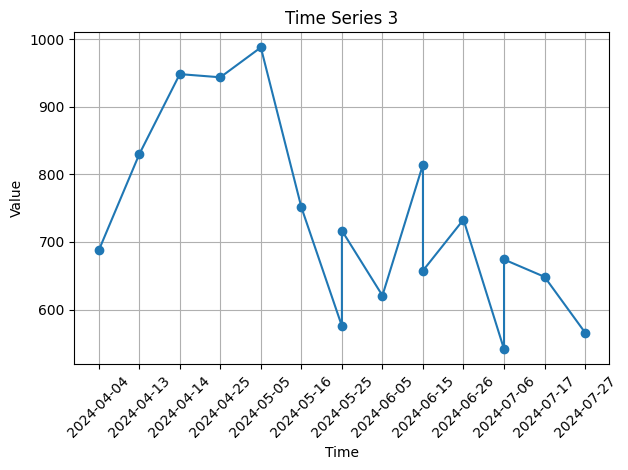

2024-12-08T00:35:23 - category - : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-08T00:35:23 - category - : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


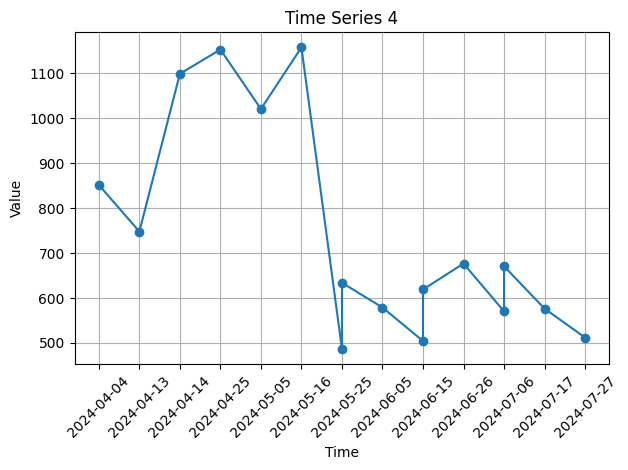

2024-12-08T00:35:23 - category - : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-08T00:35:23 - category - : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


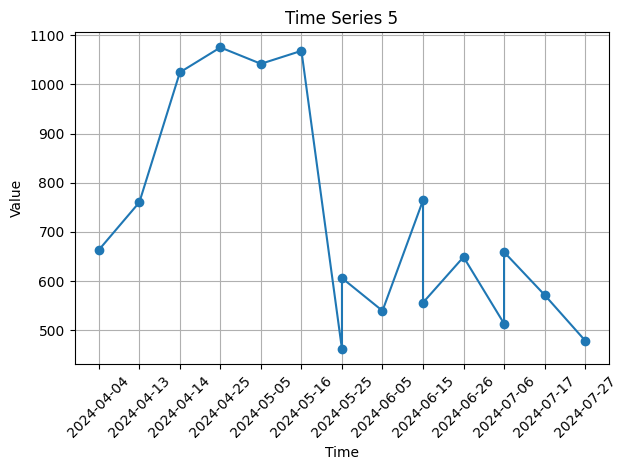

In [84]:
import matplotlib.pyplot as plt
times = [d.strftime("%Y-%m-%d") for d in tall]
for idx, row in enumerate(Estimate.AllQ):
    plt.figure()
    plt.plot(times, row, marker='o')
    plt.title(f'Time Series {idx + 1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [73]:
geometry_reach = gdf[['reach_id','geometry']]


In [99]:
geometrys = []

for reach_id in reach_ids:
    sel = geometry_reach.loc[geometry_reach['reach_id'] == str(reach_id)]
    for _,row in sel.iterrows():
        reach_geometry = row['geometry']
        
        break
    geometrys.append(reach_geometry)


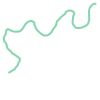

In [ ]:
#write the data to a shapefile
